In [1]:
import pandas as pd 
path = 'Datasets/'
df = pd.read_excel(path + '../datasets/Credit_card.xlsx', index_col='ID')

print(df.shape)
df.head(10)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [3]:
class_freq = (df.groupby('default payment next month').size())
print (type(class_freq))
print(class_freq)

<class 'pandas.core.series.Series'>
default payment next month
0    23364
1     6636
dtype: int64


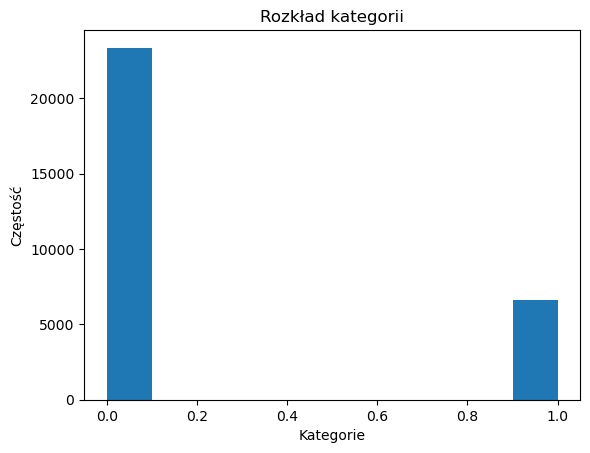

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.hist( df['default payment next month'] )
plt.xlabel('Categories')
plt.ylabel('Frequences')
plt.title('Value counts')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train,test = train_test_split (df, test_size=0.3, random_state=50, shuffle = True)

position_of_target_val = 23

X_train = train.iloc[:,:position_of_target_val]
y_train = train.iloc[:,position_of_target_val:] 
X_test = test.iloc[:,:position_of_target_val]
y_test = test.iloc[:,position_of_target_val:] 

print(X_train.shape)
print(X_test.shape)

(21000, 23)
(9000, 23)


In [6]:
print(y_train.shape)
print(y_test.shape)
y_train.head()

(21000, 1)
(9000, 1)


,default payment next month
ID,
14612,0
1448,0
7477,1
20468,0
19371,0


In [14]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

tree_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy') 
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))

#kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#cv_results = cross_val_score(tree_clf, X_train, y_train, cv=kfold, scoring='f1')
#print('Cross validation: mean',  round(cv_results.mean(),2), ', standard deviation: ', round(cv_results.std(),2))

Accuracy: 0.8267777777777777
[[6719  355]
 [1204  722]]
F1 measure: 0.4808524808524809


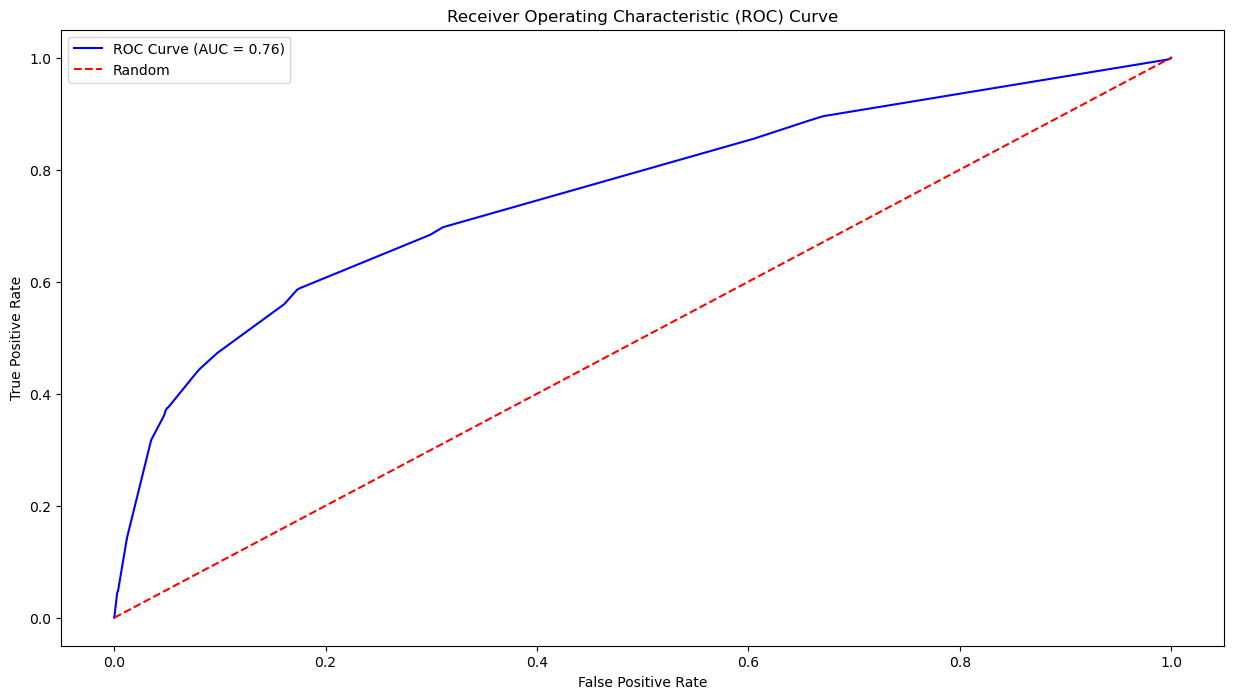

In [23]:
# ROC for DT
from sklearn.metrics import roc_curve, roc_auc_score

probs = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

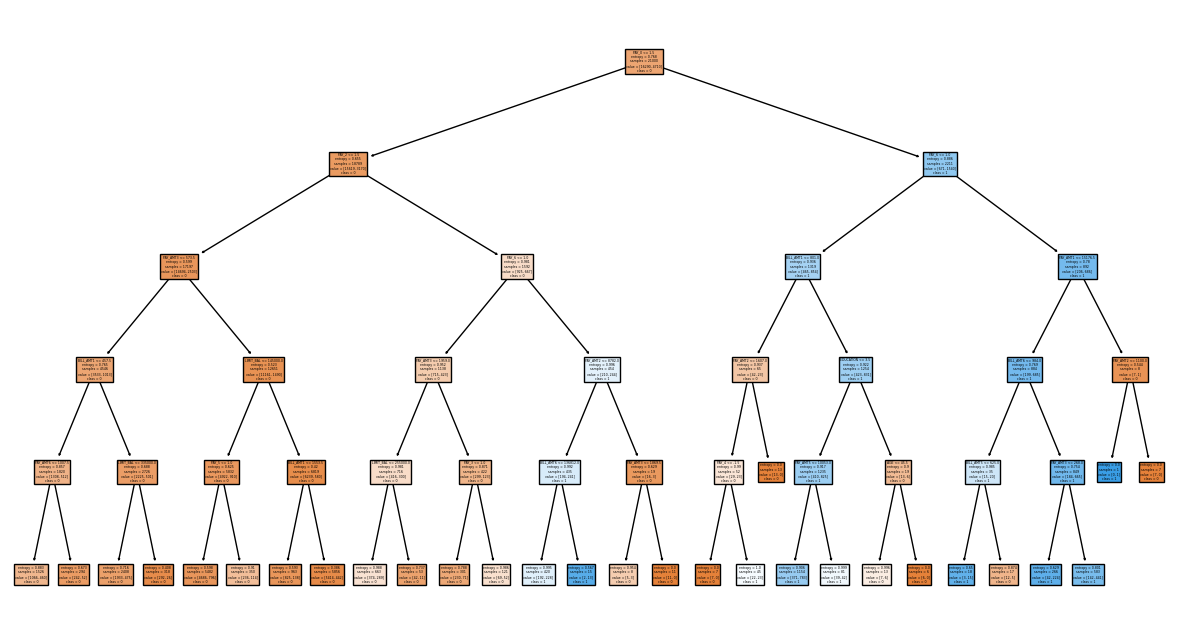

In [15]:
from sklearn import tree 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
# t_names = ["1", "2", "3"]
t_names = ["0", "1"]
tree.plot_tree(tree_clf, feature_names = f_names, 
                   class_names=t_names, filled = True)
plt.show()

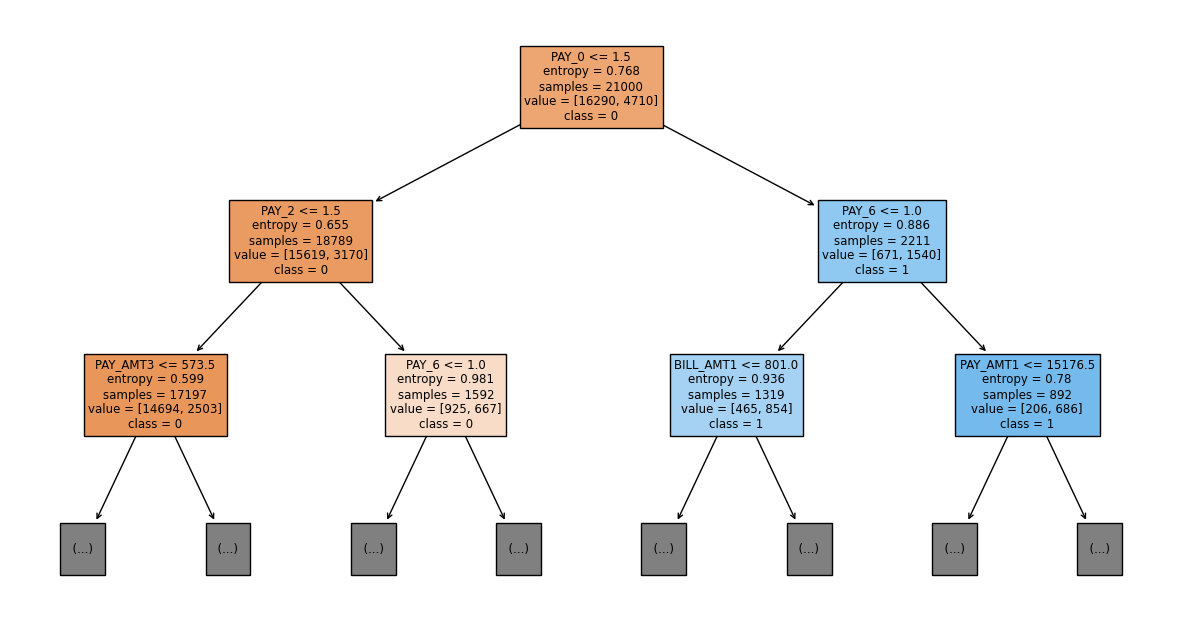

In [16]:
fig = plt.figure(figsize=(15,8))
tree.plot_tree(tree_clf, feature_names = f_names, 
                   class_names=t_names, filled = True, max_depth=2)
plt.show()

In [17]:
# DT - Text form
from sklearn.tree import export_text
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
r = export_text(tree_clf, feature_names = f_names)
print(r)

|--- PAY_0 <= 1.50
|   |--- PAY_2 <= 1.50
|   |   |--- PAY_AMT3 <= 573.50
|   |   |   |--- BILL_AMT1 <= 457.50
|   |   |   |   |--- PAY_AMT6 <= 1007.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_AMT6 >  1007.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- BILL_AMT1 >  457.50
|   |   |   |   |--- LIMIT_BAL <= 335000.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- LIMIT_BAL >  335000.00
|   |   |   |   |   |--- class: 0
|   |   |--- PAY_AMT3 >  573.50
|   |   |   |--- LIMIT_BAL <= 145000.00
|   |   |   |   |--- PAY_5 <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_5 >  1.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- LIMIT_BAL >  145000.00
|   |   |   |   |--- BILL_AMT1 <= 1553.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BILL_AMT1 >  1553.50
|   |   |   |   |   |--- class: 0
|   |--- PAY_2 >  1.50
|   |   |--- PAY_6 <= 1.00
|   |   |   |--- PAY_AMT3 <= 1959.00
|   |   |   |   |--- LIMIT_BAL <= 255000.00
|   |   |   |

In [13]:
# GridSearchCV  
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [5,10,15]
}    

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))


best score 0.7532713203755186
best param {'criterion': 'entropy', 'max_depth': 5}
Accuracy: 0.8267777777777777
[[6719  355]
 [1204  722]]
F1 measure: 0.4808524808524809


In [26]:
# RF classifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestClassifier(n_estimators = 150, criterion = 'log_loss', max_depth = 10)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8268888888888889
[[6727  347]
 [1211  715]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7074
           1       0.67      0.37      0.48      1926

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



In [25]:
# GridSearchCV RF
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [5,10,15],
    'n_estimators' : [20, 50, 100, 150]
}    

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))


/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lono/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

best score 0.7800411595041572
best param {'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 150}
Accuracy: 0.8256666666666667
[[6717  357]
 [1212  714]]
F1 measure: 0.47647647647647645


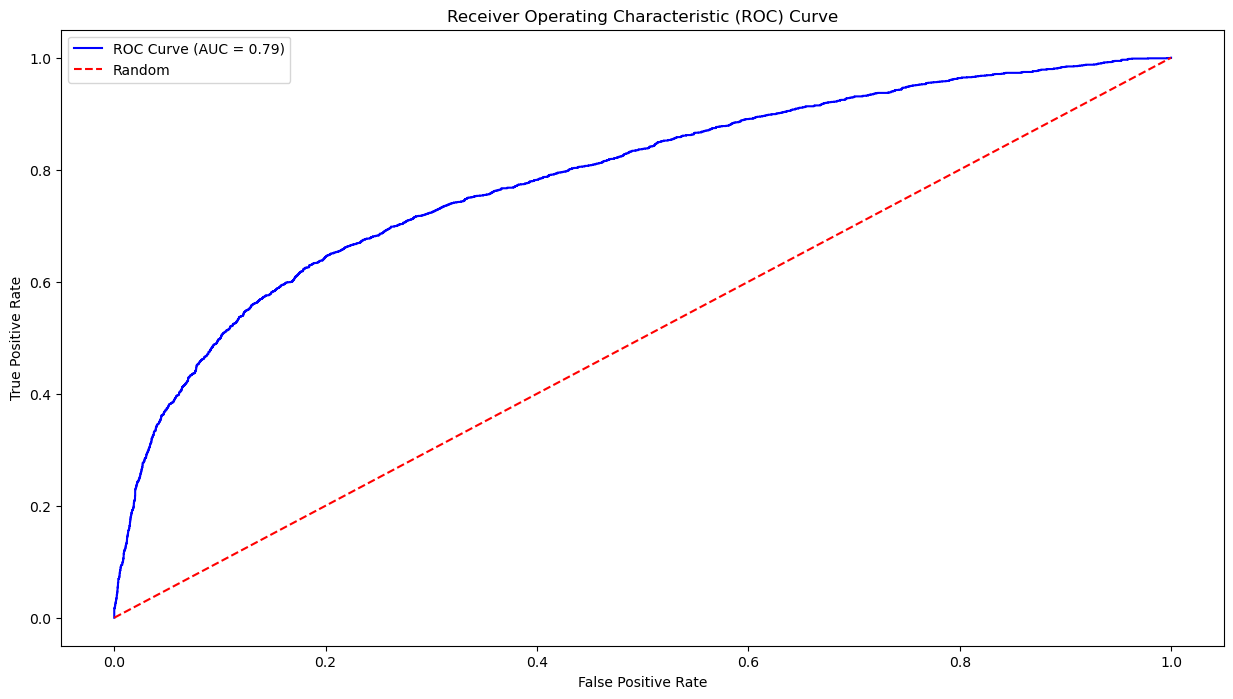

In [27]:
# ROC dla RF
from sklearn.metrics import roc_curve, roc_auc_score

probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

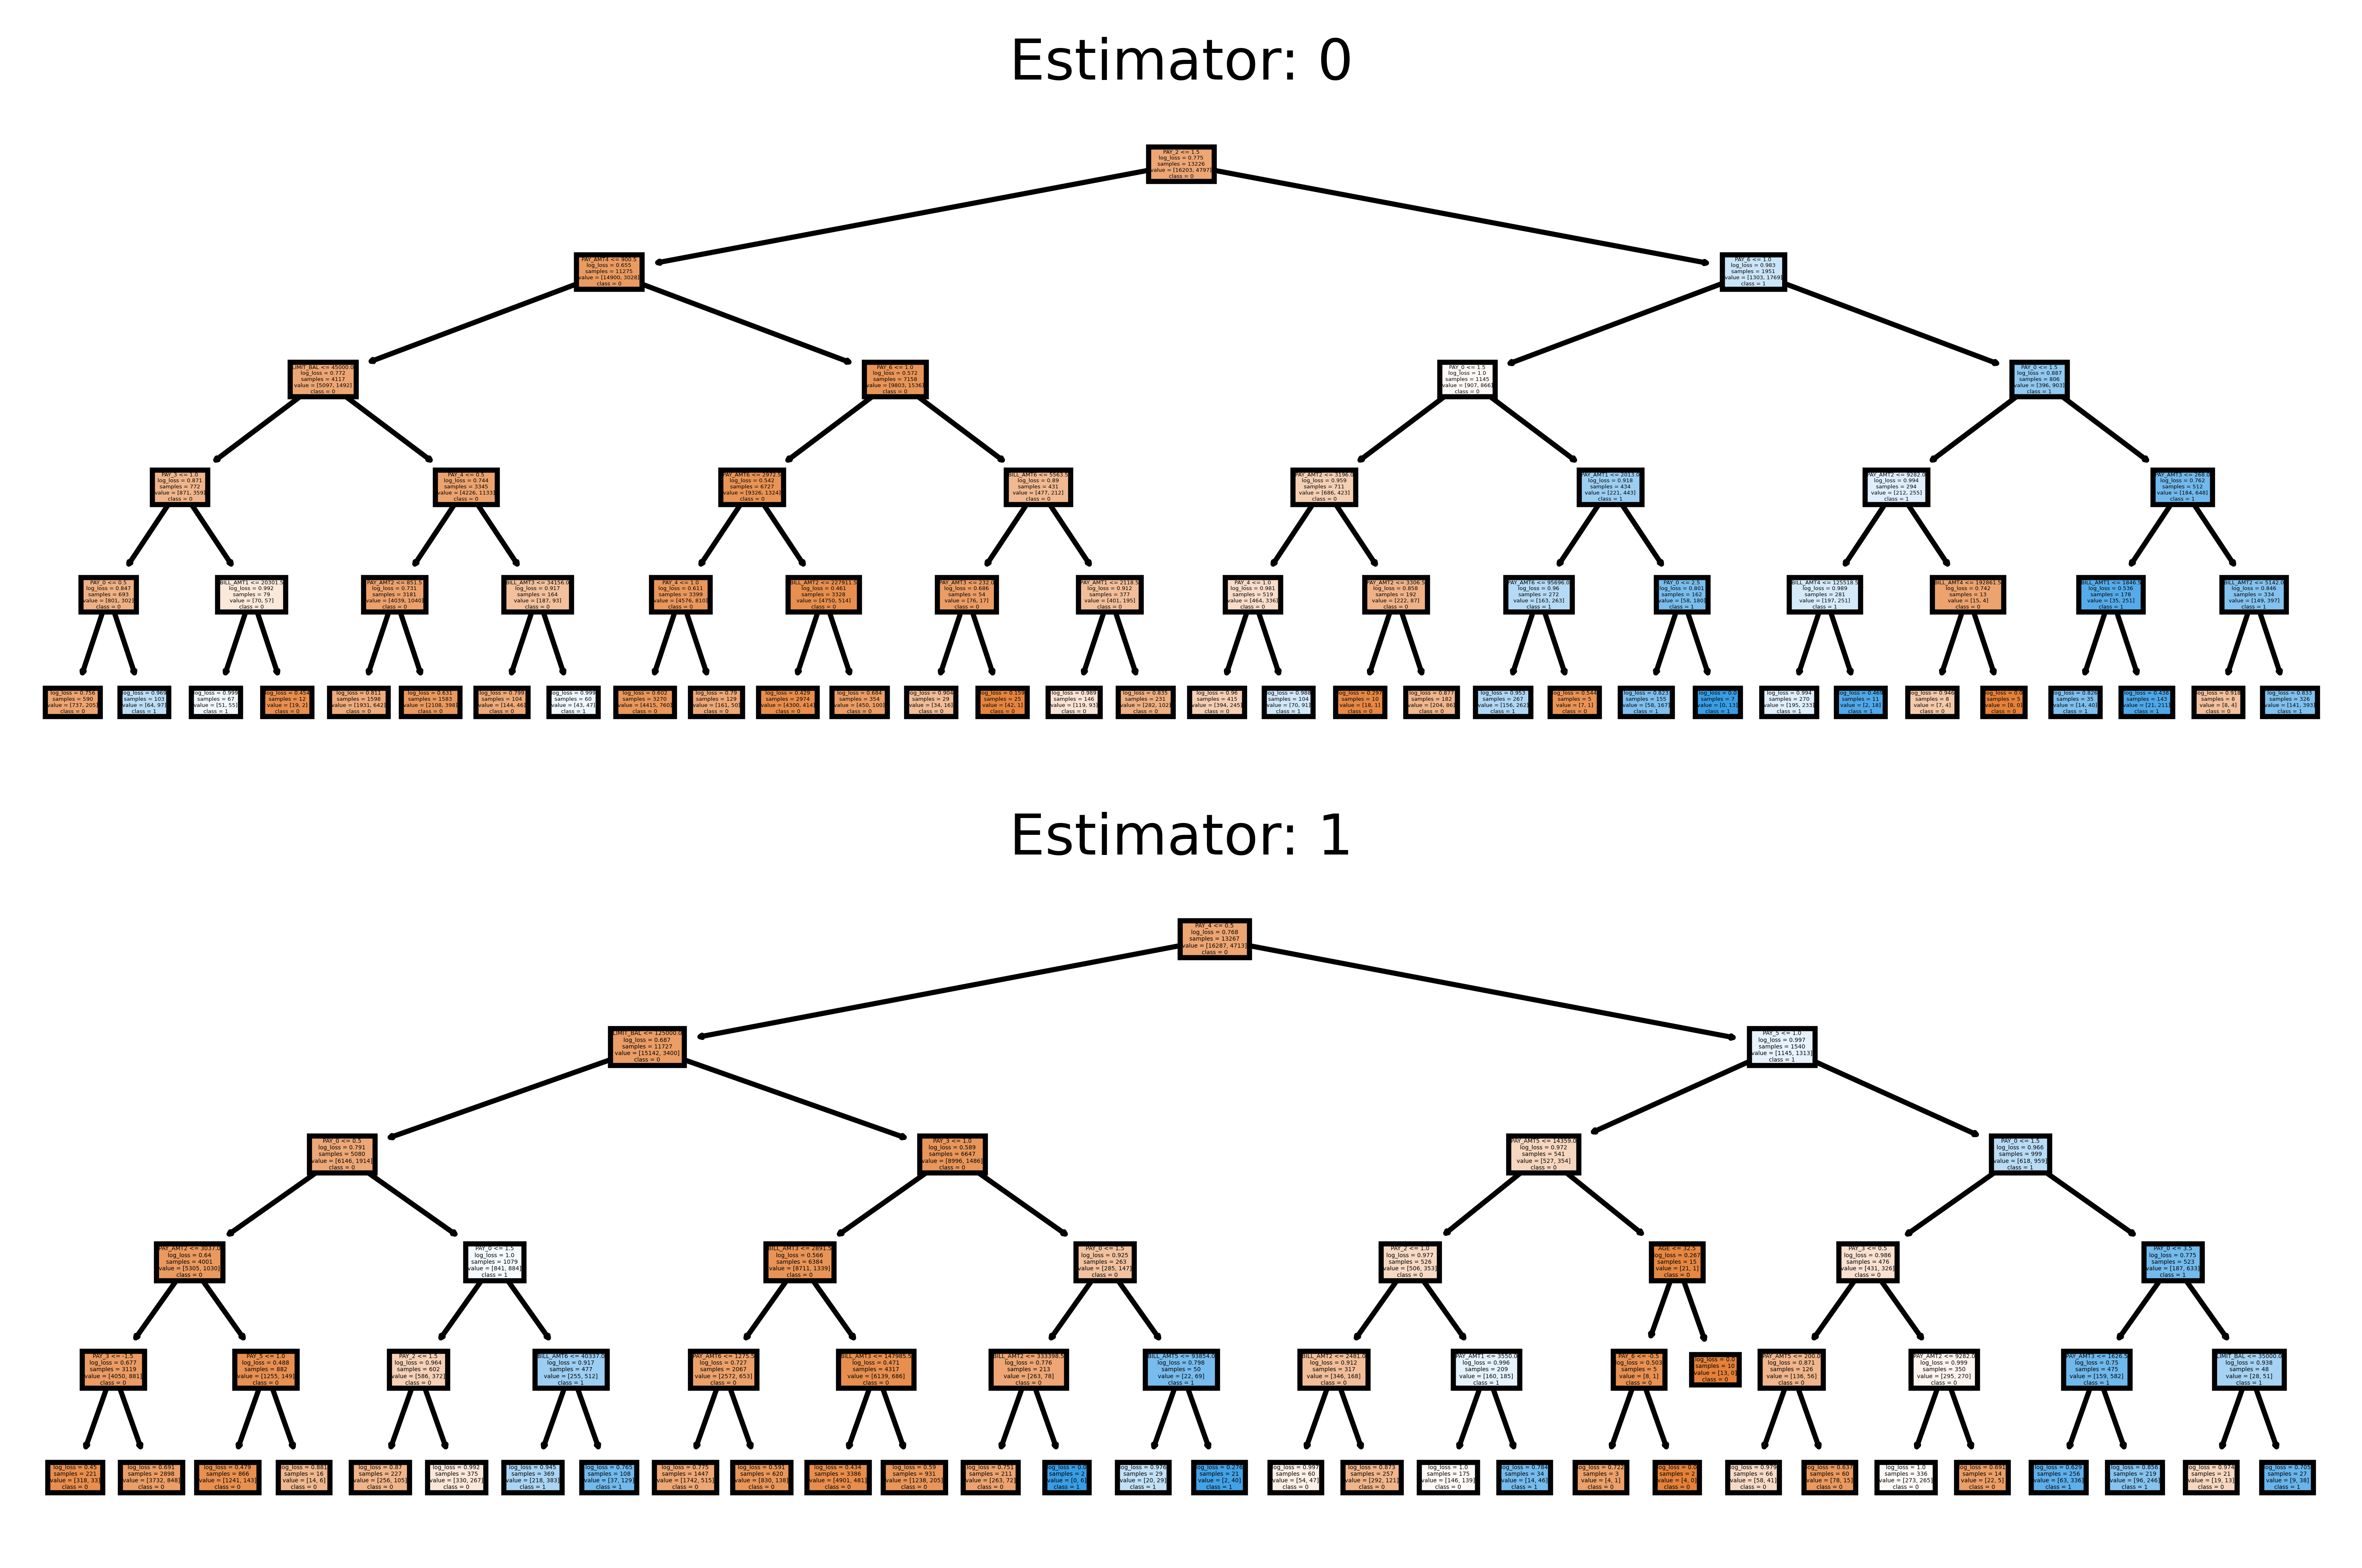

In [19]:
# RF visualization
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
t_names = ["0", "1"]
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (8,5), dpi=900)
for index in range(0, 2):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = f_names, 
                   class_names=t_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

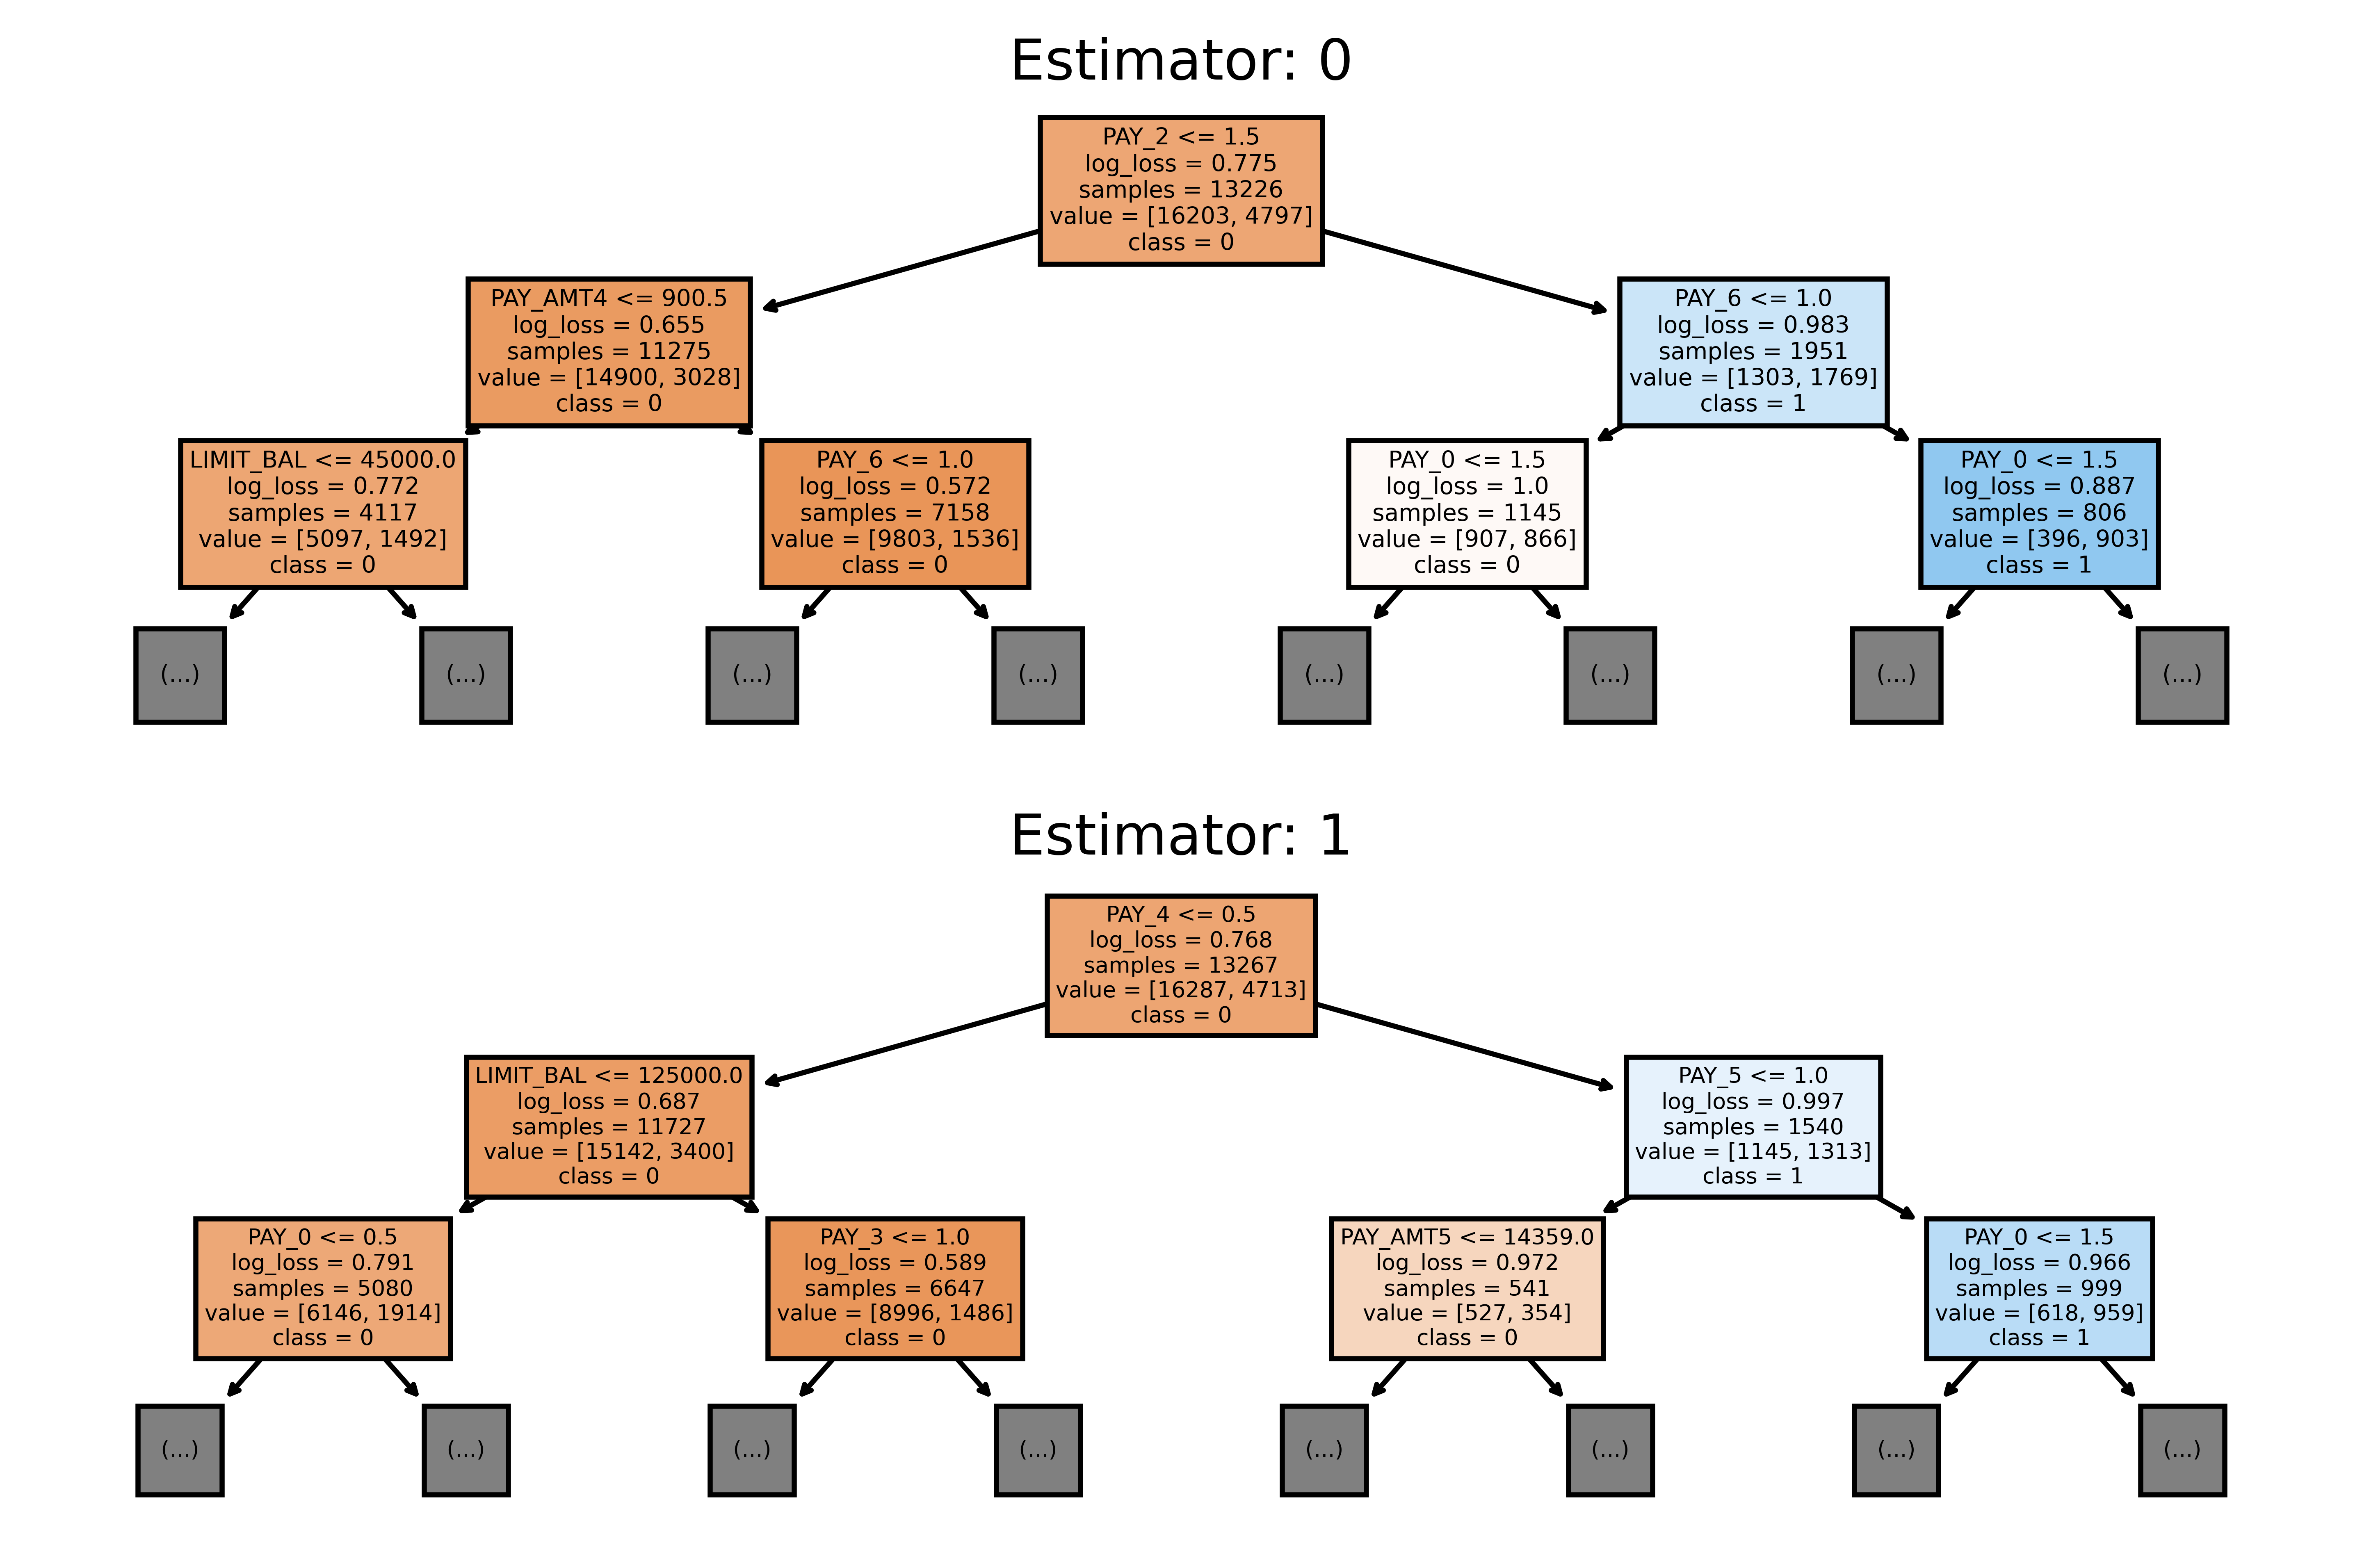

In [20]:
t_names = ["0", "1"]
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (8,5), dpi=900)
for index in range(0, 2):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = f_names, 
                   class_names=t_names,
                   filled = True,
                   ax = axes[index],
                   max_depth=2);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)